In [3]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('plastic-pollution.csv')

In [5]:
df

,Entity,Code,Year,Mismanaged plastic waste to ocean per capita (kg per year)
0,Africa,NaN,2019,0.059823
1,Albania,ALB,2019,0.543214
2,Algeria,DZA,2019,0.134114
3,Angola,AGO,2019,0.027023
4,Antigua and Barbuda,ATG,2019,0.020619
...,...,...,...,...
160,Vietnam,VNM,2019,0.292561
161,Western Sahara,ESH,2019,0.065292
162,World,OWID_WRL,2019,0.126980
163,Yemen,YEM,2019,0.008641


In [5]:
df.head()
df_year = df['Year']
df_year

0        2015
1        2011
2        2021
3        2002
4        2003
         ... 
58567    1985
58568    1986
58569    1987
58570    1988
58571    1989
Name: Year, Length: 58572, dtype: int64

In [6]:
diabetes_prevalence = "Diabetes prevalence (% of population ages 20 to 79)"
gdp_percapita = "GDP per capita, PPP (constant 2017 international $)"
print(diabetes_prevalence)
print(gdp_percapita)

Diabetes prevalence (% of population ages 20 to 79)
GDP per capita, PPP (constant 2017 international $)


In [7]:
df_2021 = df.loc[df['Year'] == 2021]
df_2021_clean = df_2021.dropna(subset=[diabetes_prevalence, gdp_percapita])
df_2021_clean

,Entity,Code,Year,Diabetes prevalence (% of population ages 20 to 79),"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
2,Afghanistan,AFG,2021,10.900000,1516.3057,4.009946e+07,NaN
597,Albania,ALB,2021,10.200000,14518.9060,2.854710e+06,NaN
856,Algeria,DZA,2021,7.100000,11039.8060,4.417796e+07,NaN
1488,Angola,AGO,2021,4.600000,5908.5700,3.450378e+07,NaN
1872,Antigua and Barbuda,ATG,2021,11.700000,19124.4300,9.322900e+04,NaN
...,...,...,...,...,...,...,...
56240,Vanuatu,VUT,2021,15.600000,2783.0195,3.191460e+05,NaN
56950,Vietnam,VNM,2021,6.100000,10628.2190,9.746802e+07,NaN
57409,World,OWID_WRL,2021,9.803712,16997.1350,7.909295e+09,NaN
58054,Zambia,ZMB,2021,11.900000,3236.7890,1.947313e+07,NaN


In [12]:
df_clean = df.dropna(subset=[diabetes_prevalence, gdp_percapita])
df_clean
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

poly = PolynomialFeatures(degree=2)
# Ubah kolom menjadi array 2D karena itu yang diperlukan oleh sklearn
X = df['Year'].values.reshape(-1,1)
y = df['Mismanaged plastic waste to ocean per capita (kg per year)'].values.reshape(-1,1)
# # Buat model regresi linier
X_poly = poly.fit_transform(X)
model = LinearRegression()

# # Latih model dengan data
model.fit(X_poly, y)

# # Cetak koefisien dan intersep
print("Coefficient: ", model.coef_)
print("Intercept: ", model.intercept_)

Coefficient:  [[0. 0. 0.]]
Intercept:  [0.20727462]


ValueError: X has 1 features, but LinearRegression is expecting 3 features as input.

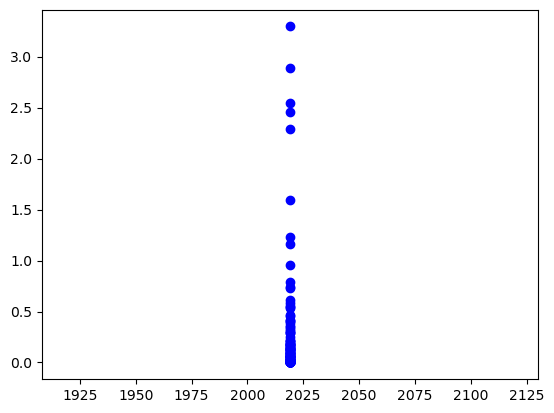

In [12]:
import matplotlib.pyplot as plt

# Membuat scatter plot
plt.scatter(X, y, color='blue')

# Membuat garis regresi linier
y_pred = model.predict(X)
plt.plot(X, y_pred, color='red')

# Menambahkan judul dan label
plt.title('GDP per Capita vs Diabetes Prevalence')
plt.xlabel('GDP per Capita')
plt.ylabel('Diabetes Prevalence')

# Menampilkan plot
plt.show()

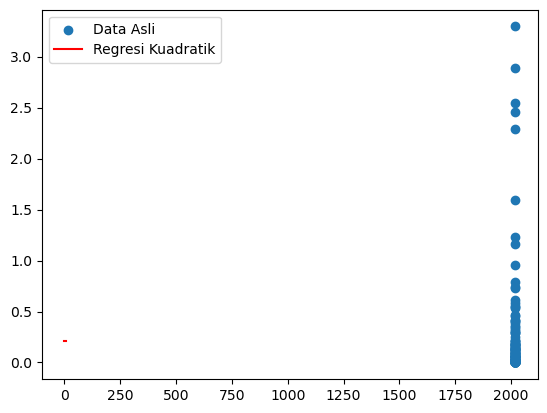

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Persiapkan data
X = df['Year'].values.reshape(-1,1)
y = df['Mismanaged plastic waste to ocean per capita (kg per year)']

# Transformasi fitur menjadi polinomial
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Inisialisasi dan latih model regresi linier
model = LinearRegression()
model.fit(X_poly, y)

# Prediksi dan visualisasi hasil
X_fit = np.arange(0, 6, 0.1).reshape(-1, 1)
X_fit_poly = poly.transform(X_fit)
y_fit = model.predict(X_fit_poly)

plt.scatter(X, y, label='Data Asli')
plt.plot(X_fit, y_fit, label='Regresi Kuadratik', color='red')
plt.legend()
plt.show()
